In [368]:
# Download via terminal commands
!wget "https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip"
!unzip "wiki_cbow_300.zip"

--2023-07-19 11:07:47--  https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip
Resolving ia803107.us.archive.org (ia803107.us.archive.org)... 207.241.232.157
Connecting to ia803107.us.archive.org (ia803107.us.archive.org)|207.241.232.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364888893 (348M) [application/zip]
Saving to: ‘wiki_cbow_300.zip’

wiki_cbow_300.zip   100%[===================>] 347.98M  9.34MB/s    in 24s     

2023-07-19 11:08:11 (14.7 MB/s) - ‘wiki_cbow_300.zip’ saved [364888893/364888893]

Archive:  wiki_cbow_300.zip
  inflating: wikipedia_cbow_300      
  inflating: wikipedia_cbow_300.trainables.syn1neg.npy  
  inflating: wikipedia_cbow_300.wv.vectors.npy  


In [370]:
# -*- coding: utf8 -*-
import gensim
import re

# load the model/content/wikipedia_cbow_300
model = gensim.models.Word2Vec.load('wikipedia_cbow_300')

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)

    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    text = text.replace(':','')
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    #trim
    text = text.strip()

    return text

In [371]:
## SPECIFY HERE THE FILE PATH YOU WANT TO CHECK FOR PALAGIRISM
paths=['/content/Almersal_freedom.txt','/content/chatgpt_freedom.txt','/content/mawdoo3.com_freedom.txt','/content/Sotor_mother.txt']

In [372]:
contents=[]
for path in paths :
  with open(path, 'r') as file:
    # Read the entire content of the file into a variable
    file_contents = file.read()
    contents.append(file_contents)

In [ ]:
!pip install Tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.6 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [373]:
from textblob import TextBlob
import re
import nltk

nltk.download("stopwords")
nltk.download('punkt')

stops = set(nltk.corpus.stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}


import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])


from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
ArListem = ArabicLightStemmer()
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [374]:
for content in contents:
  content=normalizeArabic(remove_stop_words(content))


In [375]:
import re

S=[re.split('،|\n', x) for x in contents]

In [376]:
S[3]

['الأمُّ نفحةٌ من نفحاتِ الجنّة',
 ' نسمةُ ربيعٍ وادعة تملأ القلبَ بالحياة',
 ' وهي أقربُ مخلوقٍ',
 ' الامهات من أكثر الناس عطاءً.']

In [301]:
import numpy as np

In [377]:
result=[]
for mawdoo3 in S:
  for gomla in mawdoo3:
    gomla=clean_str(gomla)
    temp_tokens=gomla.split(' ')
    if temp_tokens[0]=='' :
      continue


    count_temp=0
    while temp_tokens[count_temp] not in model.wv.index_to_key :
      if count_temp == (len(temp_tokens)-1):
        break

      temp_tokens[count_temp]=stem(temp_tokens[count_temp])
      if temp_tokens[count_temp] not in model.wv.index_to_key:
        count_temp+=1

    tempArr=model.wv[temp_tokens[count_temp]]
    for i in range(count_temp,len(temp_tokens)):
      if temp_tokens[i] not in model.wv.index_to_key:
        temp_tokens[i]=stem(temp_tokens[i])
        if temp_tokens[i] not in model.wv.index_to_key:
          continue
      new_numpy=model.wv[ temp_tokens[i]]
      tempArr=np.vstack((tempArr, new_numpy))


    result.append(tempArr)

In [378]:
kol_el_gomaal=[]
for index in S:
  for gomla in index:
    if gomla == '':
      continue
    kol_el_gomaal.append(gomla)

In [379]:
len(kol_el_gomaal)

9

In [380]:
result[0].shape

(15, 300)

In [381]:
avereged=[]
for sentence in result:
  avereged.append(np.mean(sentence, axis=0))

In [382]:
from sklearn.metrics.pairwise import pairwise_distances
# Calculate cosine similarity between each pair of sentences
cosine_similarity_scores = 1 - pairwise_distances(avereged, metric='cosine')

# Print the cosine similarity scores between each pair of sentences
print(cosine_similarity_scores)


[[ 1.          0.675382    0.709762    0.45165086  0.41399586  0.31888372
  -0.05230439  0.21822953  0.3481896 ]
 [ 0.675382    1.          0.6757375   0.3936168   0.4422863   0.26016092
  -0.11396372  0.14189059  0.31025624]
 [ 0.709762    0.6757375   0.99999994  0.43267357  0.49071914  0.20224118
  -0.01403093 -0.01674509  0.19626838]
 [ 0.45165086  0.3936168   0.43267357  1.          0.44206858  0.25997436
  -0.04649031  0.0336501   0.35730517]
 [ 0.41399586  0.4422863   0.49071914  0.44206858  0.9999998   0.04130489
  -0.09506226 -0.01221097  0.09585243]
 [ 0.31888372  0.26016092  0.20224118  0.25997436  0.04130489  1.
   0.04025722  0.16967332  0.47408605]
 [-0.05230439 -0.11396372 -0.01403093 -0.04649031 -0.09506226  0.04025722
   0.99999994  0.00123113  0.03058714]
 [ 0.21822953  0.14189059 -0.01674509  0.0336501  -0.01221097  0.16967332
   0.00123113  1.          0.04310787]
 [ 0.3481896   0.31025624  0.19626838  0.35730517  0.09585243  0.47408605
   0.03058714  0.04310787  0.9

In [383]:
cosine_similarity_scores.shape #total of 9 sentences

(9, 9)

In [384]:
import matplotlib.pyplot as plt
import networkx as nx

!pip install arabic-reshaper
!pip install python-bidi

import arabic_reshaper
from bidi.algorithm import get_display

In [387]:
def graph_sentences_by_similarity(sentences,cosine_similarity_scores):
    # Create a graph. Each node represents a sentence.
    G = nx.Graph()
    reshaped_sentences=[get_display(arabic_reshaper.reshape(x)) for x in sentences]
    G.add_nodes_from(reshaped_sentences)


    # Add an edge between two sentences whose similarity is > 0.5.
    for row in range(0, len(cosine_similarity_scores)):
        for col in range(0, len(cosine_similarity_scores[0])):
            if row != col and cosine_similarity_scores[row][col] > 0.4:
                G.add_edge(reshaped_sentences[row], reshaped_sentences[col])

    # Remove nodes that don't have any edges (i.e. dissimilar sentences).
    # G.remove_nodes_from(list(nx.isolates(G)))
    pos = nx.shell_layout(G, nlist=None, rotate=None, scale=1, center=None, dim=2)

    fig, ax = plt.subplots(1,1)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color="skyblue", font_size=10, font_color='black', ax=ax)
    ax.set_title("Sentence Similarity Graph")
    xlim = ax.get_xlim()
    dx = xlim[1]-xlim[0]
    ax.set_xlim(xlim[0]-dx, xlim[1]+dx)

    plt.savefig("Graph.png", format="PNG")
    plt.show()



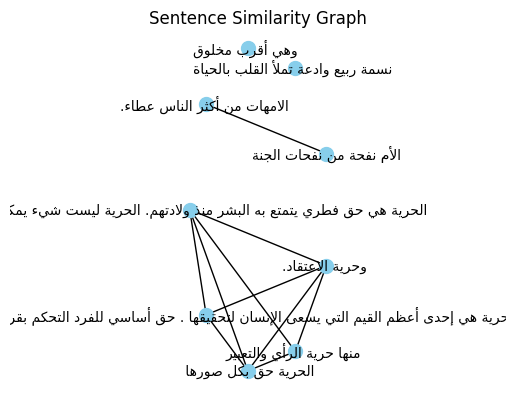

In [388]:
graph_sentences_by_similarity(kol_el_gomaal,cosine_similarity_scores)

In [ ]:
""